In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os,cv2

def plot_gallery (images, titles, h, w, n_row=3, n_col=4): 
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8* n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
       plt.subplot(n_row, n_col, i + 1)
       plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
       plt.title(titles[i], size=12)
       plt.xticks(())
       plt.yticks(())

In [2]:
dir_name= "D:/insternship/dataset/faces/"
y=[];x=[];target_names=[]
person_id=0;h=w=300
n_samples=0
class_names=[]
for person_name in os.listdir(dir_name):
    #print(person_name)
    dir_path = dir_name+person_name+"/"
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        # formulate the image path
        image_path = dir_path+image_name
        #Read the input image
        img = cv2.imread(image_path)
        #Convert into grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #resize image to 300*300 dimension
        resized_image= cv2.resize(gray, (h,w))
        #convert matrix to vector
        v = resized_image.flatten()
        x.append(v)
        #increase the number of samples
        n_samples =n_samples+1
        #Addinng th categorical Label
        y.append(person_id)
        #adding the person name
        target_names.append(person_name)
    # Increase the person id by 1
    person_id=person_id+1

#transform list to numpy array
y=np.array(y)
X=np.array(x)
target_names =np.array(target_names)
n_features = X.shape[1]
print(y.shape, X. shape, target_names.shape)
print("Number of sampels:",n_samples)
# Download the data, if not already on disk and load it as numpy arrays
#Lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
## introspect the images arrays to find the shapes (for plotting)
#n_samples, h, w = lfw_people.images.shape
#print(n_samples, h, w)
# for machine Learning we use the 2 data directly (os relative pixel
# positions info is ignored by this model)
#XLfw_people.data
#n features = X. shape[1]
#print(X.shape)
## the Label to predict is the id of the person
#y Lfw_people.target
#print(y)
# if @ in y:
# print("yes")
#target_names = Ifw people.target_names
#print(target_names)

n_classes =target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

(450,) (450, 90000) (450,)
Number of sampels: 450
Total dataset size:
n_samples: 450
n_features: 90000
n_classes: 450


Extracting the top 150 eigenfaces from 337 faces


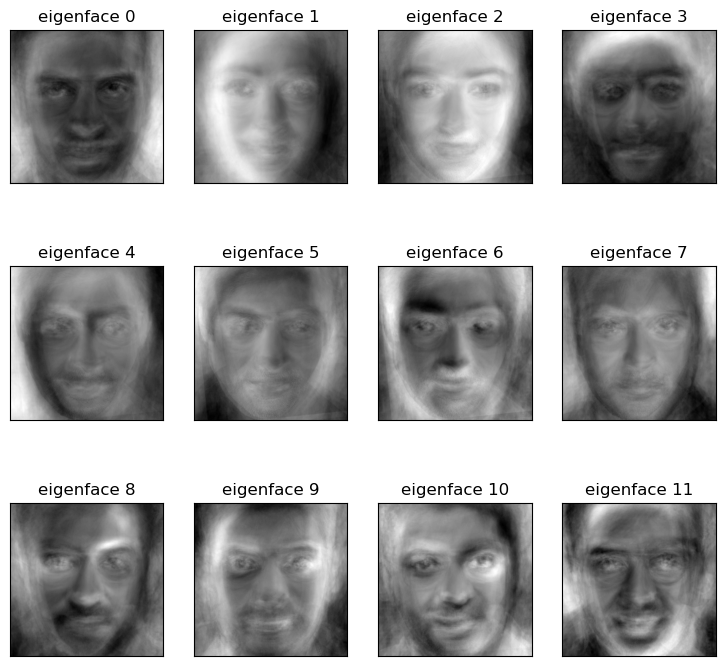

Projecting the input data on the eigenfaces orthonormal basis
(337, 150) (113, 150)
Project done...


In [3]:
#Split into a training set and a test set using a stratified k fold
#split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=42)
#Compute a PCA (eigenfaces) on the face dataset (treated as untabeled
#dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150
print("Extracting the top %d eigenfaces from %d faces"% (n_components, X_train.shape[0]))
# Applying PCA
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
# Generating eigenfaces
eigenfaces=pca.components_.reshape((n_components, h, w))

#plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

print("Projecting the input data on the eigenfaces orthonormal basis")

X_train_pca=pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape, X_test_pca.shape)
#%%Compute Fisherfaces
lda=LinearDiscriminantAnalysis()
#Compute LDA of reduced data
lda.fit(X_train_pca, y_train)
X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)
print("Project done...")

In [4]:
# Training with Multi Layer perceptron
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10,10), max_iter=1000, verbose=True).fit(X_train_lda, y_train)
print("Model Weights:")
model_info=[coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 2.87893148
Iteration 2, loss = 2.82926469
Iteration 3, loss = 2.78106852
Iteration 4, loss = 2.73430067
Iteration 5, loss = 2.68894085
Iteration 6, loss = 2.64505923
Iteration 7, loss = 2.60052427
Iteration 8, loss = 2.55753229
Iteration 9, loss = 2.51720678
Iteration 10, loss = 2.47619176
Iteration 11, loss = 2.43652539
Iteration 12, loss = 2.39969348
Iteration 13, loss = 2.36387832
Iteration 14, loss = 2.33000414
Iteration 15, loss = 2.29478908
Iteration 16, loss = 2.26239620
Iteration 17, loss = 2.23046149
Iteration 18, loss = 2.19903059
Iteration 19, loss = 2.16895934
Iteration 20, loss = 2.13932188
Iteration 21, loss = 2.11121621
Iteration 22, loss = 2.08272871
Iteration 23, loss = 2.05632456
Iteration 24, loss = 2.02904735
Iteration 25, loss = 2.00150059
Iteration 26, loss = 1.97640558
Iteration 27, loss = 1.94955686
Iteration 28, loss = 1.92479100
Iteration 29, loss = 1.89937917
Iteration 30, loss = 1.87507306
Iteration 31, loss = 1.85082491
Iteration 32, los

Accuracy: 69.02654867256638


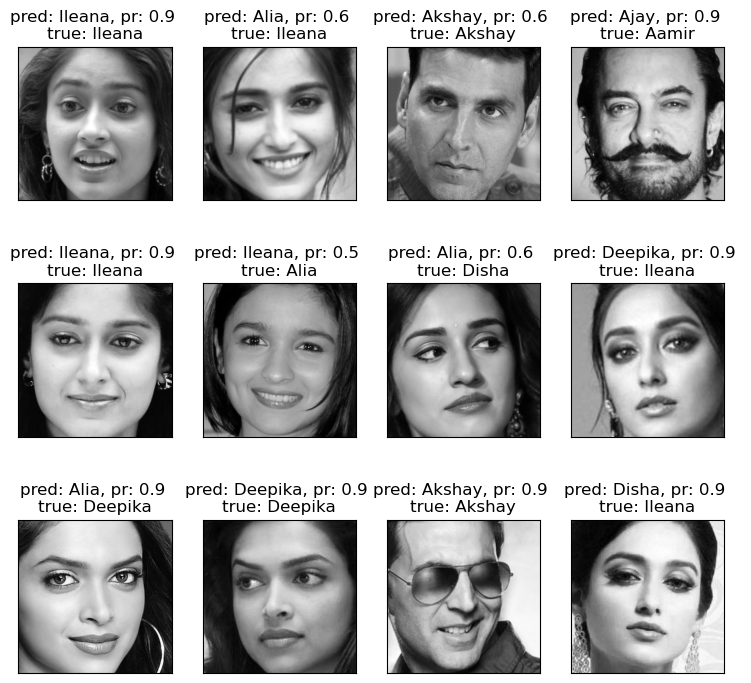

In [5]:
y_pred=[];y_prob=[]
for test_face in X_test_lda:
    prob = clf.predict_proba([test_face])[0]
    #print(prob,np.max(prob)) J
    class_id= np.where (prob == np.max(prob)) [0] [0]
    #print(class_index)
    # Find the label of the mathed face
    y_pred.append(class_id)
    y_prob.append(np.max(prob))

#Transform the data
y_pred = np.array(y_pred)

prediction_titles=[]
true_positive = 0
for i in range(y_pred.shape[0]):
   # print(y_test[i],y_pred[i])
   #true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
   # pred_name = target_names[y_pred[i]].rsplit('', 1)[-1]
   true_name = class_names[y_test[i]]
   pred_name = class_names [y_pred[i]]
   result = 'pred: %s, pr: %s \ntrue: %s' % (pred_name, str(y_prob[i]) [0:3], true_name)
   # result = 'prediction: %s \ntrue:
   prediction_titles.append(result)
   if true_name==pred_name:
       true_positive =true_positive+1

print("Accuracy:", true_positive*100/y_pred.shape[0])
## Plot results
plot_gallery(X_test, prediction_titles, h, w)
plt.show()